In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time

In [13]:
sample1 = pd.read_csv('250_sample_1.csv')
sample2 = pd.read_csv('250_sample_2.csv')
sample3 = pd.read_csv('250_sample_3.csv')
sample4 = pd.read_csv('250_sample_4.csv')
sample5 = pd.read_csv('250_sample_5.csv')
sample5.head()

,zip_code,total,non_hispanic_tot,Not Hispanic or Latino householder: - Householder who is White alone,Not Hispanic or Latino householder: - Householder who is Black or African American alone,Not Hispanic or Latino householder: - Householder who is American Indian and Alaska Native alone,Not Hispanic or Latino householder: - Householder who is Asian alone,Not Hispanic or Latino householder: - Householder who is Native Hawaiian and Other Pacific Islander alone,Not Hispanic or Latino householder: - Householder who is Some other race alone,Not Hispanic or Latino householder: - Householder who is Two or more races,...,Id_zip,per_capita_income_2017_estimate,per_capita_income_2017_margin,white_tot,black_tot,indian_tot,asian_tot,native_tot,other_tot,mixed_tot
0,21075,7299,7173,5974,718,26,353,2,7,93,...,8600000US21075,41396.0,1900.0,7299,6041,722,26,356,2,45
1,39341,2880,2859,963,1876,7,2,0,2,9,...,8600000US39341,14771.0,1914.0,2880,970,1885,7,2,0,7
2,55092,3163,3150,3111,7,10,7,0,0,15,...,8600000US55092,34118.0,2206.0,3163,3119,7,11,7,0,3
3,32960,9312,8927,8339,395,17,85,2,4,85,...,8600000US32960,26184.0,3657.0,9312,8605,407,17,86,2,96
4,71129,5057,4963,3140,1729,26,26,1,3,38,...,8600000US71129,24079.0,3216.0,5057,3198,1733,27,27,1,24


In [16]:
allsamples = [sample1, sample2, sample3, sample4, sample5]

In [18]:
#add back the trailing 0's
for sample_data in allsamples:
    sample_data['zip_code'] = sample_data['zip_code'].astype('str')
    fun = lambda x : '0'+ str(x) if len(x) == 4 else ('00'+ str(x) if len(x) == 3 else str(x))
    sample_data['zip_code'] = sample_data['zip_code'].apply(fun)

In [23]:
#Set up Columns to populate from each query

for sample_data in allsamples:
    sample_data['chinese_count'] = 0
    sample_data['ch_tot_review_ct'] = 0
    sample_data['ch_avg_review_ct'] = 0
    sample_data['ch_avg_rating'] = 0
    sample_data['mexican_count'] = 0
    sample_data['mx_tot_review_ct'] = 0
    sample_data['mx_avg_review_ct'] = 0
    sample_data['mx_avg_rating'] = 0    
    sample_data['fastfood_count'] = 0
    sample_data['ff_tot_review_ct'] = 0
    sample_data['ff_avg_review_ct'] = 0
    sample_data['ff_avg_rating'] = 0

In [22]:
#Define parameters for API call
from config import api_key
base_url = 'https://api.yelp.com/v3/businesses/search?'
head = {'Authorization': 'Bearer '+ api_key}
params = {
    'categories': '',
    'limit': 50, #max limit is 50
    'radius': 3000
       }

In [69]:
params['categories'] = 'mexican'
#Use this line if you just want to do for one of the samples. comment out if you want to use the loop
#sample_data = sample1
t0 = time.time()

for sample_data in allsamples:
    i = 1
    for index,row in sample_data.iterrows():
        while i <= 250:
            i +=1
            params['location'] = row['zip_code']
            output = requests.get(base_url, params, headers=head).json()
            tot_review_count = 0
            tot_rating = 0
            tot_count = 0
            for restaurant in output['businesses']:
                tot_count = output['total']
                tot_review_count += restaurant['review_count']
                tot_rating += restaurant['rating']
            if tot_count <= params['limit']:
                    pass
            else:
                num = params['limit']
                while num < tot_count:
                    params['offest'] = num
                    output = requests.get(base_url, params, headers=head).json()
                    for restaurant in output['businesses']:
                        tot_review_count += restaurant['review_count']
                        tot_rating += restaurant['rating']
                    num += params['limit']
            try:
                sample_data.loc[index,'mexican_count'] = output['total']
                sample_data.loc[index,'mx_tot_review_ct'] = tot_review_count
                sample_data.loc[index,'mx_avg_review_ct'] = round(tot_review_count/tot_count,2)
                sample_data.loc[index,'mx_avg_rating'] = round(tot_rating/tot_count,2)
            except ZeroDivisionError:
                print(f'iteration {i} division by zero')
            break

print(f'run time = {time.time() - t0}')

iteration 4 division by zero
iteration 6 division by zero
iteration 9 division by zero
iteration 10 division by zero
iteration 11 division by zero
iteration 14 division by zero
iteration 15 division by zero
iteration 17 division by zero
iteration 24 division by zero
iteration 37 division by zero
iteration 39 division by zero
iteration 41 division by zero
iteration 43 division by zero
iteration 47 division by zero
iteration 63 division by zero
iteration 65 division by zero
iteration 68 division by zero
iteration 72 division by zero
iteration 74 division by zero
iteration 75 division by zero
iteration 76 division by zero
iteration 79 division by zero
iteration 80 division by zero
iteration 86 division by zero
iteration 92 division by zero
iteration 95 division by zero
iteration 103 division by zero
iteration 114 division by zero
iteration 119 division by zero
iteration 120 division by zero
iteration 121 division by zero
iteration 123 division by zero
iteration 124 division by zero
iterat

iteration 137 division by zero
iteration 138 division by zero
iteration 144 division by zero
iteration 145 division by zero
iteration 147 division by zero
iteration 155 division by zero
iteration 157 division by zero
iteration 158 division by zero
iteration 161 division by zero
iteration 164 division by zero
iteration 167 division by zero
iteration 171 division by zero
iteration 175 division by zero
iteration 181 division by zero
iteration 184 division by zero
iteration 198 division by zero
iteration 199 division by zero
iteration 204 division by zero
iteration 205 division by zero
iteration 207 division by zero
iteration 211 division by zero
iteration 212 division by zero
iteration 216 division by zero
iteration 229 division by zero
iteration 232 division by zero
iteration 234 division by zero
iteration 236 division by zero
iteration 244 division by zero
iteration 250 division by zero
iteration 251 division by zero
iteration 3 division by zero
iteration 4 division by zero
iteration 6 

In [56]:
params['categories'] = 'chinese'
#Use this line if you just want to do for one of the samples. comment out if you want to use the loop
#sample_data = sample1


for sample_data in allsamples:
    i = 1
    for index,row in sample_data.iterrows():
        while i <= 250:
            i +=1
            params['location'] = row['zip_code']
            output = requests.get(base_url, params, headers=head).json()
            tot_review_count = 0
            tot_rating = 0
            tot_count = 0
            for restaurant in output['businesses']:
                tot_count = output['total']
                tot_review_count += restaurant['review_count']
                tot_rating += restaurant['rating']
            if tot_count <= params['limit']:
                    pass
            else:
                num = params['limit']
                while num < tot_count:
                    params['offest'] = num
                    output = requests.get(base_url, params, headers=head).json()
                    for restaurant in output['businesses']:
                        tot_review_count += restaurant['review_count']
                        tot_rating += restaurant['rating']
                    num += params['limit']
            try:
                sample_data.loc[index,'chinese_count'] = output['total']
                sample_data.loc[index,'ch_tot_review_ct'] = tot_review_count
                sample_data.loc[index,'ch_avg_review_ct'] = round(tot_review_count/tot_count,2)
                sample_data.loc[index,'ch_avg_rating'] = round(tot_rating/tot_count,2)
            except ZeroDivisionError:
                print('division by zero')
            break

division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by ze

In [73]:
params['categories'] = 'hotdogs'
#Use this line if you just want to do for one of the samples. comment out if you want to use the loop
#sample_data = sample1

t0 = time.time()

for sample_data in allsamples:
    i = 1
    for index,row in sample_data.iterrows():
        while i <= 250:
            i +=1
            params['location'] = row['zip_code']
            output = requests.get(base_url, params, headers=head).json()
            tot_review_count = 0
            tot_rating = 0
            tot_count = 0
            for restaurant in output['businesses']:
                tot_count = output['total']
                tot_review_count += restaurant['review_count']
                tot_rating += restaurant['rating']
            if tot_count <= params['limit']:
                    pass
            else:
                num = params['limit']
                while num < tot_count:
                    params['offest'] = num
                    output = requests.get(base_url, params, headers=head).json()
                    for restaurant in output['businesses']:
                        tot_review_count += restaurant['review_count']
                        tot_rating += restaurant['rating']
                    num += params['limit']
            try:
                sample_data.loc[index,'fastfood_count'] = output['total']
                sample_data.loc[index,'ff_tot_review_ct'] = tot_review_count
                sample_data.loc[index,'ff_avg_review_ct'] = round(tot_review_count/tot_count,2)
                sample_data.loc[index,'ff_avg_rating'] = round(tot_rating/tot_count,2)
            except ZeroDivisionError:
                pass
            break
    print(f'time elapsed = {time.time() - t0}')
            

print(f'Total run time = {time.time() - t0}')

time elapsed = 140.72525906562805
time elapsed = 283.5190510749817
time elapsed = 421.7944321632385
time elapsed = 558.2060701847076
time elapsed = 692.1128251552582
Total run time = 692.1129972934723


In [75]:
sample4.head(10)

,zip_code,total,non_hispanic_tot,Not Hispanic or Latino householder: - Householder who is White alone,Not Hispanic or Latino householder: - Householder who is Black or African American alone,Not Hispanic or Latino householder: - Householder who is American Indian and Alaska Native alone,Not Hispanic or Latino householder: - Householder who is Asian alone,Not Hispanic or Latino householder: - Householder who is Native Hawaiian and Other Pacific Islander alone,Not Hispanic or Latino householder: - Householder who is Some other race alone,Not Hispanic or Latino householder: - Householder who is Two or more races,...,ch_avg_review_ct,ch_avg_rating,mexican_count,mx_tot_review_ct,mx_avg_review_ct,mx_avg_rating,fastfood_count,ff_tot_review_ct,ff_avg_review_ct,ff_avg_rating
0,58078,5813,5754,5650,16,45,10,2,3,28,...,0.00,0.00,0,0,0.00,0.00,0,0,0.00,0.00
1,78602,6279,5572,4805,633,36,36,1,3,58,...,54.00,2.50,14,365,26.07,3.21,12,195,16.25,2.46
2,29180,5521,5470,2509,2929,2,9,0,2,19,...,4.00,3.50,1,2,2.00,2.50,1,1,1.00,1.00
3,70062,6604,6171,3307,2706,28,57,1,6,66,...,34.75,3.12,15,678,45.20,3.03,25,345,13.80,2.26
4,62208,5939,5856,4824,896,9,71,0,2,54,...,28.20,3.40,5,209,41.80,3.60,17,300,17.65,3.00
5,11238,21104,19154,3813,13814,47,714,17,112,637,...,109.86,4.38,96,24798,258.31,4.06,74,3152,42.59,3.93
6,60645,16136,14350,10066,1638,27,1974,8,77,560,...,87.07,3.10,44,2869,65.20,3.69,40,1234,30.85,2.75
7,29902,9098,8847,6733,1935,21,70,10,3,75,...,0.00,0.00,1,36,36.00,4.00,0,0,0.00,0.00
8,78758,18024,13844,10136,1992,38,1338,8,33,299,...,271.71,3.61,63,13992,222.10,6.13,29,1236,42.62,2.79
9,44136,16209,16075,15329,207,6,429,1,1,102,...,32.67,3.00,7,179,25.57,3.14,15,234,15.60,3.07


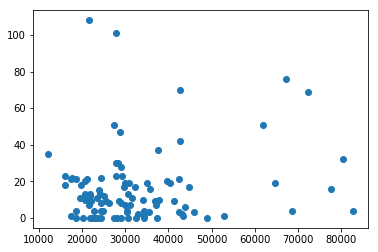

In [113]:
plt.scatter(sample1['per_capita_income_2017_estimate'],sample1['fastfood_count'])

In [74]:
sample1.to_csv('250_sample_1_Results.csv', index=False)
sample2.to_csv('250_sample_2_Results.csv', index=False)
sample3.to_csv('250_sample_3_Results.csv', index=False)
sample4.to_csv('250_sample_4_Results.csv', index=False)
sample5.to_csv('250_sample_5_Results.csv', index=False)